# Pattern Recognition coursework

## Q1 - [10] Eigenfaces

### a)

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from math import sqrt
import time
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from collections import Counter
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
#Import data
mat = scipy.io.loadmat('face.mat')
X = mat['X']
l = mat['l']
print(X.shape)
print(l.shape)
X[:,0]

(2576, 520)
(1, 520)


array([106, 103, 103, ...,  37,  36,  41], dtype=uint8)

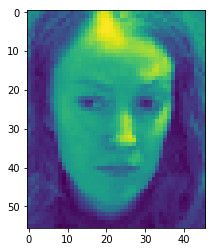

In [3]:
# Test for plotting one data (image)
def plot_image(X, index):
    #print(X.shape)
    X1 = np.transpose(np.reshape(X[:,index], (46,56)))
    plt.imshow(X1)
    plt.savefig('image.png', format="png")
    plt.show()
plot_image(X, 10)
#plt.savefig('image.pdf', format="pdf")

In [4]:
# Test for plotting several datas (image)
def plot_images(X):
    for i in range(10,20,1):
        X_single_image = np.transpose(np.reshape(X[:,i], (46,56)))
        plt.figure()
        plt.imshow(X_single_image)
    plt.show()

#plot_images(X)

In [5]:
#shuffle the datas 
X_random = X
l_random = l
combined = zip(np.transpose(X_random), l_random[0])
random.shuffle(combined)
X_random, l_random = zip(*combined)

In [6]:
#Creation of training (80%) and testing datas (20%)
X_train, X_test, y_train, y_test = train_test_split(X_random, l_random, test_size=0.2)

(416, 2576)
(416,)


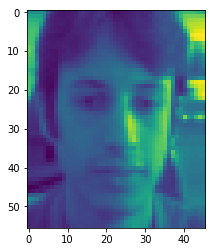

In [15]:
print(np.array(X_train).shape)
print(np.array(y_train).shape)

plt.imshow(np.transpose(np.reshape(X_train[0], (46,56))))

True
(2576,)
2576


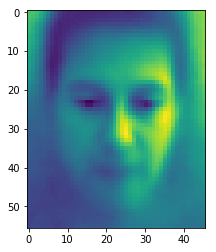

In [8]:
# Calculate the mean image of all datas
print(len(X_train)==len(y_train))
N = len(X_train)
X_train_mean = [sum(x)/N for x in zip(*X_train)]
D = len(X_train_mean)
print(np.array(X_train_mean).shape)
print(D)
plt.imshow(np.transpose(np.reshape(np.array(X_train_mean), (46,56))))
plt.savefig('mean.png', format='png')
plt.show()

In [ ]:
#We calculate the centered datas (phi) and put them in a list (A which is a matrix)
A = []
for i in range(N):
    phi = [x-y for x, y in zip(X_train[i], X_train_mean)]
    A.append(phi)
    #plt.figure()
    #plt.imshow(np.transpose(np.reshape(np.array(phi), (46,56))))
    #plt.show()
print('phi.shape = ', np.array(phi).shape)
plt.imshow(np.transpose(np.reshape(np.array(A[39]), (46,56))))
plt.savefig('phi.png', format='png')
plt.show()

In [ ]:
# We calculate the covariance with 2 ways : big S (S1) and small S (S2)

#print(S)
start = time.time()
S1 = (1./N)*np.dot(np.transpose(A), A)
print'Time for S1 in %fs'% (time.time()-start)

start = time.time()
S2 = (1./N)*np.dot(A, np.transpose(A))
print'Time for S2 in %fs'% (time.time()-start)

print('A.shape = ', np.array(A).shape)
print('S.shape = ', S1.shape)
print('S.shape = ', S2.shape)

In [ ]:
# We first use the big S : S1 and we calculate its single values
#w, v = np.linalg.eigh(S1)
start = time.time()
u, s, v = np.linalg.svd(S1)
print(s.shape)
print(v.shape)
print'Time for S1 decomposition in %fs'% (time.time()-start)
#Time for S1 decomposition in 12.329370s

In [ ]:
# We try to determine M (completely useless)
plt.plot(s)
eigs = [x/sum(s) for x in np.cumsum(s)]
plt.figure()
plt.plot(eigs)
eigs_chosen = [x for x in eigs if x<0.99]
print "M with 99% info = ",len(eigs_chosen)

In [ ]:
#we choose the number of principal components
s_non_zeros = [x for x in s if x>1]
M = len(s_non_zeros) #M = values of non-zeros eigen values. M = D !!
M = 50

In [ ]:
# omega_test is the projection for one image, we tested first to check if it works. Omega_bigS contains all the projections.
q = 39
print(np.array(A[q]).shape)
print(np.array(v[:M]).shape)
#np.dot(A[0], v_sort[0])
print(X_train[q].shape)
omega_test = np.dot(A[q], np.transpose(v[:M]))
Omega_bigS = np.dot(A, np.transpose(v[:M]))
print "omega test = ", omega_test.shape
print "Gros Omega = ", Omega_bigS.shape
Omega_bigS[0].shape
omega_test = Omega_bigS[q]

In [ ]:
### Reconstruction of the imagee
def recons(v, Omega, q):
    bite = []
    for i in range(M):
        ui = [Omega[q][i]*a for a in v[i]]
        #print(np.array(ui).shape)
        bite.append(ui)
    approx = [sum(item) for item in np.transpose(bite)]
    #print(np.array(np.transpose(bite)).shape)
    #print(np.array(approx).shape)
    X_recons = [x+y for x, y in zip(X_train_mean, approx)]
    return X_recons

start = time.time()
X_train_recons = []
for n in range(N):
    X_recons = recons(v, Omega_bigS, n)
    X_train_recons.append(X_recons)
print'Time for S1 reconstruction in %fs'% (time.time()-start)

#Show the reconstructed image
X_final = np.transpose(np.reshape(X_train_recons[q], (46,56)))
plt.imshow(X_final)
plt.show()

#Show the original image
X1 = np.transpose(np.reshape(X_train[q], (46,56)))
plt.figure()
plt.imshow(X1)
plt.show()

In [ ]:
### Reconstruction of the imagee
start = time.time()
bite = []
for i in range(M):
    ui = [omega_test[i]*a for a in v[i]]
    bite.append(ui)
approx = [sum(item) for item in np.transpose(bite)]
X_recons = [x+y for x, y in zip(X_train_mean, approx)]
print'Time for S1 reconstruction in %fs'% (time.time()-start)

#Show the reconstructed image
X_final = np.transpose(np.reshape(X_recons, (46,56)))
plt.imshow(X_final)
#plt.savefig('M10_image.png', format='png')
plt.show()

#Show the original image
X1 = np.transpose(np.reshape(X_train[q], (46,56)))
plt.figure()
plt.imshow(X1)
plt.show()

In [ ]:
# Mean square error
rms1 = mean_squared_error(X1, X_final)
print'Mean Squared Error : ', rms1
#M=10 : 510.204462108
#M=50 : 213.771931809
#M=100 : 100.813015611
#M=200 : 38.9705166199
#M=416 : 1.9749691179e-25

In [ ]:
# We compare the errors : first MSE, second the distortion defined as the sum of the eigenvalues which weren't used
print"Eigenvalues S1 shape ", s.shape
print"Dist1 shape", s[M:].shape
dist1 = sum(s[M:])
print'Distortion in theory : ', rms1
print'Distortion in practice : ', dist1/2576

### b)

In [ ]:
# Now we do the same with the small S : S2
start = time.time()
u2, s2, v2 = np.linalg.svd(S2)
print'Time for S2 decomposition in %fs'% (time.time()-start)
#Time for S2 decomposition in 0.101017s

In [ ]:
# We check whether S1's and S2's eigenvalues are the same.
print(np.array(S2).shape)
print(np.array(u2).shape)
print(np.array(s2).shape)
print(np.array(v2).shape)
diff = [x-y for x,y in zip(s[:N], s2)]
plt.plot(diff)
#plt.title('Difference between S1 and S2 eigenvalues for different values of M')
plt.xlabel('Value of M')
plt.ylabel('Difference of S1 and S2')
#plt.savefig('diff_eigenvalues.png', format='png')
plt.show()
print"Sum of difference between S1 and S2 eigenvalues : ",sum(diff)

In [ ]:
# We normalize the eigenvectors v2
M = 50
q = 39
print(np.array(A[q]).shape)
print(np.array(v2[:M]).shape)
print(X_train[q].shape)
print(np.array(A)[:,q].shape)

#v2_padding = np.zeros((M, D))
#for m in range(M):
#    for n in range(N):
#        v2_padding[m][n] = v2[m][n]
#print v2_padding.shape
start = time.time()
v2_reshape = np.dot(v2, A)
print(v2_reshape.shape)
print"Norme d'enculé du 1er vecteur u2=A.v2 : ",np.linalg.norm(v2_reshape[0])

v2_norm = np.zeros(v2_reshape.shape)
print(v2_norm.shape)
for i in range(N):
    v2_norm[i] = v2_reshape[i]/(np.linalg.norm(v2_reshape[i]))
print"Norme du héros v2_norm: ",np.linalg.norm(v2_norm[0])
print'Time for S2 normalization in %fs'% (time.time()-start)

In [ ]:
omega_test = np.dot(np.transpose(A[q]), np.transpose(v2_norm[:M]))
Omega = np.dot(A, np.transpose(v2_norm[:M]))
print"omega test = ", omega_test.shape
print"Gros Omega = ", Omega.shape
Omega[0].shape
omega_test = Omega[q]

In [ ]:
start = time.time()
X_train_recons = []
for n in range(N):
    X_recons = recons(v2_norm[:M], Omega, n)
    X_train_recons.append(X_recons)
print'Time for S2 reconstruction in %fs'% (time.time()-start)

X_final = np.transpose(np.reshape(X_train_recons[q], (46,56)))
plt.imshow(X_final)
plt.show()

X1 = np.transpose(np.reshape(X_train[q], (46,56)))
plt.figure()
plt.imshow(X1)
plt.show()

In [ ]:
start = time.time()
bite = []
for i in range(M):
    ui = [omega_test[i]*a for a in v2_norm[i]]
    bite.append(ui)
approx = [sum(item) for item in np.transpose(bite)]
X_recons = [x+y for x, y in zip(X_train_mean, approx)]
print'Time for S1 reconstruction in %fs'% (time.time()-start)

#Show the reconstructed image
X_final = np.transpose(np.reshape(X_recons, (46,56)))
plt.imshow(X_final)
#plt.savefig('M10_image.png', format='png')
plt.show()

#Show the original image
X1 = np.transpose(np.reshape(X_train[q], (46,56)))
plt.figure()
plt.imshow(X1)
plt.show()

In [ ]:
rms2 = mean_squared_error(X1, X_final)
print'Mean Squared Error : ', rms2
#M=416 : 1.76751634471e-24

In [ ]:
# Idem for S2
print"Eigenvalues S2 shape ", s2.shape
print"Dist1 shape", s2[M:].shape
dist2 = sum(s2[M:])
print'Distortion in theory : ', rms2
print'Distortion in practice : ', dist2/N

## [15] Application of Eigenfaces

### a)

NEED TEST FOR OTHER VALUES OF M !!

In [ ]:
# We compare the errors : first MSE, second the distortion defined as the sum of the eigenvalues which weren't used
print"Eigenvalues S1 shape ", s.shape
print"Dist1 shape", s[M:].shape
dist1 = sum(s[M:])
print'Distortion in theory : ', rms1
print'Distortion in practice : ', dist1

In [ ]:
# Idem for S2
print"Eigenvalues S2 shape ", s2.shape
print"Dist1 shape", s2[M:].shape
dist2 = sum(s2[M:])
print'Distortion in theory : ', rms2
print'Distortion in practice : ', dist2

In [ ]:
### Training steps !!
#Scores = []
#for k in range(1,10):
NN = KNeighborsClassifier(1)#, metric='manhattan' is the best)
NN.fit(X_train_recons, y_train)
y_pred_train = NN.predict(X_train_recons)
y_pred_test = NN.predict(X_test)
print'Training score for Nearest Neighbours classifier : ', accuracy_score(y_train, y_pred_train)
print'Testing score for Nearest Neighbours classifier : ', accuracy_score(y_test, y_pred_test)
#    Scores.append(accuracy_score(y_test, y_pred))
#plt.plot(Scores)
#plt.show()

In [ ]:
# LDA can be used as a technic to reduce the dimension of datas like PCA, or as a classifier. Here, it is a classifier.
fisher_lda = LinearDiscriminantAnalysis()
fisher_lda.fit(X_train_recons, y_train)
y_pred = fisher_lda.predict(X_test)
print'Score for LDA classifier : ', accuracy_score(y_test, y_pred)

In [ ]:
start = time.time()
svm = SVC(kernel='linear', decision_function_shape='ovo')
svm.fit(X_train, y_train)
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)
print'Training score for SVM classifier : ', accuracy_score(y_train, y_pred_train)
print'Testing score for SVM classifier : ', accuracy_score(y_test, y_pred_test)
print'Time in %fs'% (time.time()-start)

In [ ]:
start = time.time()
lsvm = LinearSVC()
lsvm.fit(X_train, y_train)
y_pred_train = lsvm.predict(X_train)
y_pred_test = lsvm.predict(X_test)
print'Training score for Linear SVM classifier : ', accuracy_score(y_train, y_pred_train)
print'Testing score for Linear SVM classifier : ', accuracy_score(y_test, y_pred_test)
print'Time in %fs'% (time.time()-start)

## Q2-2. [25] LDA Ensemble for Face Recognition

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_train = lda.predict(X_train)
y_pred_test = lda.predict(X_test)
print'Training score for LDA classifier : ', accuracy_score(y_train, y_pred_train)
print'Testing score for LDA classifier : ', accuracy_score(y_test, y_pred_test)

In [ ]:
#Ensemble learning : bagging.
bagging = BaggingClassifier(lda, n_estimators=50, max_features=52, n_jobs=-1)
bagging.fit(X_train, y_train)
y_pred_train2 = bagging.predict(X_train)
y_pred_test2 = bagging.predict(X_test)
print'Training score for Bagging LDA classifier : ', accuracy_score(y_train, y_pred_train2)
print'Testing score for Bagging LDA classifier : ', accuracy_score(y_test, y_pred_test2)

In [ ]:
#We implement the NN-classifier after PCA manually to test
### TEST FOR ONE IMAGE ###
q = 70
X1 = np.transpose(np.reshape(X_test[q], (46,56)))
plt.imshow(X1)
plt.show()

phi2 = [x-y for x, y in zip(X_test[q], X_train_mean)]
omega_test2 = np.dot(phi2, np.transpose(v[:M]))
print(omega_test2.shape)
print(Omega_bigS.shape)

error = []
for n in range(N):
    e = np.linalg.norm([x-y for x,y in zip(omega_test2, Omega_bigS[n])]) #Omega_bigS because we use v, which is bigS eigenvalue.
    error.append(e)
index = np.argmin(error)
print"Predict index n : ",index
plt.imshow(np.transpose(np.reshape(X_train_recons[index], (46,56))))
plt.show()

print"Predict label : ", y_train[index]
print"True label : ", y_test[q]

In [ ]:
def score_NN(metrics):
    start = time.time()
    dist = DistanceMetric.get_metric(metrics)
    N_test = len(X_test)
    Score = 0
    for q in range(N_test):
        phi2 = [x-y for x, y in zip(X_test[q], X_train_mean)]
        omega_test2 = np.dot(phi2, np.transpose(v[:M]))
        error = []
        for n in range(N):
            e = dist.pairwise([[x-y for x,y in zip(omega_test2, Omega_bigS[n])],np.zeros(N)])
            error.append(e[0][1])
        index = np.argmin(error)

        if y_train[index] == y_test[q]:
            Score = Score + 1
    Score = (Score+0.0)/N_test #convert to float

    print"Nearest Neighbours score with PCA : ", Score
    print'Time in %fs'% (time.time()-start)
 
score_NN('euclidean')

In [ ]:
score_NN('manhattan')

In [ ]:
score_NN('chebyshev')

### PCA-LDA

In [ ]:
# Here, we use the LDA as a reductor of data's dimensions.
#M_lda = 48  # M_min=48 so that the testing score is maximal
M_values = range(1,48,4)
training_score_lda = []
testing_score_lda = []
for M_lda in M_values:
    lda = LinearDiscriminantAnalysis(n_components=M_lda)
    lda.fit(X_train, y_train)
    X_train_recons_lda = lda.transform(X_train)
#print(np.array(X_train).shape)
#print(X_train_recons_lda.shape)
#print(np.array(y_train).shape)
    X_test_recons_lda = lda.transform(X_test)

    NN_lda = KNeighborsClassifier(1)#, metric='manhattan')
    NN_lda.fit(X_train_recons_lda, y_train)
    y_pred_train = NN_lda.predict(X_train_recons_lda)
    y_pred_test = NN_lda.predict(X_test_recons_lda)
    
    training_score_lda.append(accuracy_score(y_train, y_pred_train))
    testing_score_lda.append(accuracy_score(y_test, y_pred_test))
#print'Training score for Nearest Neighbours classifier after LDA: ', accuracy_score(y_train, y_pred_train)
#print'Testing score for Nearest Neighbours classifier after LDA: ', accuracy_score(y_test, y_pred_test)
#Exactly like Fisher-LDA for M>=48
plt.plot(M_values, training_score_lda, M_values, testing_score_lda)
plt.legend(['Training score', 'Testing score'])
plt.title('Comparison between training and testing score for LDA')
plt.xlabel('Values of M')
plt.ylabel('Scores')
plt.show()

In [ ]:
#M_pca = 69
M_values = range(1,48,4)
training_score_pca = []
testing_score_pca = []
for M_pca in M_values:
    pca = PCA(n_components=M_pca)
    pca.fit(X_train, y_train)
    X_train_recons_lda = pca.transform(X_train)
    X_test_recons_lda = pca.transform(X_test)

    NN_pca = KNeighborsClassifier(1)#, metric='manhattan')
    NN_pca.fit(X_train_recons_lda, y_train)
    y_pred_train = NN_pca.predict(X_train_recons_lda)
    y_pred_test = NN_pca.predict(X_test_recons_lda)
#print'Training score for Nearest Neighbours classifier after PCA: ', accuracy_score(y_train, y_pred_train)
#print'Testing score for Nearest Neighbours classifier after PCA: ', accuracy_score(y_test, y_pred_test)

    training_score_pca.append(accuracy_score(y_train, y_pred_train))
    testing_score_pca.append(accuracy_score(y_test, y_pred_test))

plt.plot(M_values, training_score_pca, M_values, testing_score_pca)
plt.legend(['Training score', 'Testing score'])
plt.title('Comparison between training and testing score for PCA')
plt.xlabel('Values of M')
plt.ylabel('Scores')
plt.show()

In [ ]:
plt.plot(M_values, testing_score_lda, 'red', M_values, testing_score_pca, 'green')
plt.legend(['LDA score', 'PCA score'])
plt.title('Comparison between LDA and PCA testing score')
plt.xlabel('Values of M')
plt.ylabel('Scores')
plt.show()

## 2. Multi-class SVM

### One-versus-All 

In [16]:
##Calculate PCA components
start = time.time()

#Training PCA components
N = len(X_train)
X_train_mean = [sum(x)/N for x in zip(*X_train)]

A = []
for i in range(N):
    phi_train = [x-y for x, y in zip(X_train[i], X_train_mean)]
    A.append(phi_train)
    
S1 = (1./N)*np.dot(np.transpose(A), A)
u, s, v = np.linalg.svd(S1)

s_non_zeros = [x for x in s if x>1]
M = len(s_non_zeros) #M = values of non-zeros eigen values. M = D !!
Omega_bigS = np.dot(A, np.transpose(v[:M]))

#Testing PCA components
N_test = len(X_test)
A_test = []
for j in range(N_test):
    A_test.append([x-y for x, y in zip(X_test[j], X_train_mean)])
Omega_test = np.dot(A_test, np.transpose(v[:M]))

print'Time in %fs'% (time.time()-start)

Time in 30.159736s


In [17]:
#SVM Binary Classifier training
def binary_SVM_ovr(X, y):

    L = []
    label = range(min(y), max(y)+1)

    for k in label: #min=1, max=52, there are 52 different classes in this multi-class problem.
        z = [1 if y[j]==k else -1 for j in range(len(y))]
        clf_binary = SVC(kernel='linear', probability=False, C=0.1)
        L.append(clf_binary.fit(X, z))

    return L

start = time.time()
L = binary_SVM_ovr(X_train, y_train)
print'Time in %fs' % (time.time()-start)

Time in 5.869283s


In [18]:
#Prediction

def SVM_ovr_pred(X, y, L):
    
    label = range(min(y_train), max(y_train)+1)
    y_pred = []
    score = 0
    for i in range(len(X)):
        decisionF = []

        for l in label:
            dec = L[l-1].decision_function(X[i].reshape(1,-1))
            decisionF.append(dec[0])

        y_pred.append(np.argmax(decisionF)+1)

        if y[i] == np.argmax(decisionF)+1:
            score = score + 1

    return y_pred, score

start = time.time()
y_pred_train, training_score = SVM_ovr_pred(X_train, y_train, L)
print(training_score)
print'Training score for SVM classifier, One-versus-All : ', accuracy_score(y_train, y_pred_train)
print'Time in %fs'% (time.time()-start)

416
Training score for SVM classifier, One-versus-All :  1.0
Time in 7.909957s


In [19]:
start = time.time()

y_pred_test, testing_score = SVM_ovr_pred(X_test, y_test, L)
print(testing_score)
print'Testing score for SVM classifier, One-versus-All : ', accuracy_score(y_test, y_pred_test)
print'Time in %fs'% (time.time()-start)

88
Testing score for SVM classifier, One-versus-All :  0.846153846154
Time in 2.304952s


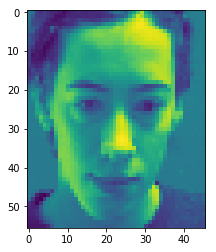

15

In [20]:
k = 18
z_train = [1 if y_train[i]==k else -1 for i in range(len(y_train))]
plot_image(np.transpose(X_train), 2)
i = 2
decisionF = L[k-1].decision_function(np.transpose(X_train[i].reshape(-1, 1)))
y_train[i]

In [28]:
#With PCA components
start = time.time()

X_train_reduced = Omega_bigS
X_test_reduced = Omega_test
print(X_test_reduced.shape)
L_PCA = binary_SVM_ovr(X_train_reduced, y_train)

y_pred_train, training_score = SVM_ovr_pred(X_train_reduced, y_train, L_PCA)
print'Time in %fs'% (time.time()-start)
start = time.time()
y_pred_test, testing_score = SVM_ovr_pred(X_test_reduced, y_test, L_PCA)
print'Training score for SVM classifier with PCA components, One-versus-All : ', accuracy_score(y_train, y_pred_train)
print'Testing score for SVM classifier with PCA components, One-versus-All : ', accuracy_score(y_test, y_pred_test)
print'Time in %fs'% (time.time()-start)

(104, 416)
Time in 4.285861s
Training score for SVM classifier with PCA components, One-versus-All :  1.0
Testing score for SVM classifier with PCA components, One-versus-All :  0.846153846154
Time in 0.885563s


In [46]:
#Influence of SVM parameters
start = time.time()
train_score = []
test_score = []
C_parameters = [0.1, 1, 5, 10, 20, 50]

X_train_reduced = Omega_bigS
X_test_reduced = Omega_test
label = range(min(y_train), max(y_train)+1)
#for C in C_parameters:
train_score = []
test_score = []
L_PCA = []
for k in label: #min=1, max=52, there are 52 different classes in this multi-class problem.
    z = [1 if y_train[j]==k else -1 for j in range(len(y_train))]
    clf_binary = SVC(kernel='linear', probability=False)
    L_PCA.append(clf_binary.fit(X_train_reduced, z))

y_pred_train, training_score = SVM_ovr_pred(X_train_reduced, y_train, L_PCA)
y_pred_test, testing_score = SVM_ovr_pred(X_test_reduced, y_test, L_PCA)

train_score.append(accuracy_score(y_train, y_pred_train))
test_score.append(accuracy_score(y_test, y_pred_test))
print'Training score for SVM with PCA, OvA : ', accuracy_score(y_train, y_pred_train)
print'Testing score for SVM with PCA, OvA : ', accuracy_score(y_test, y_pred_test)
print'Time in %fs'% (time.time()-start)

Training score for SVM with PCA, OvA :  1.0
Testing score for SVM with PCA, OvA :  0.846153846154
Time in 5.888681s


In [ ]:
plt.plot(C_parameters, train_score, label='Training score')
plt.plot(C_parameters, test_score, label='Testing score')
plt.xlabel('Value of C')
plt.ylabel('Score')
plt.title('Influence of C on Multi-Class SVM One-versus-All')
plt.legend()
plt.show()

In [52]:
pd.options.display.max_seq_items = 10000
pd.DataFrame(confusion_matrix(y_test, y_pred_test))
#print(confusion_matrix(y_test, y_pred_test))

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


### One-vs-One

In [53]:
#Training
def binary_SVM_ovo(X_train, y_train):
    label = range(min(y_train), max(y_train)+1)
    L = []
    for c1 in range(1,53):
        #print'c1 = ',c1
        label_without_c1 = label
        label_without_c1.remove(c1)

        for c2 in label_without_c1:
            #print'c2 = ',c2
            X_train_bin = []
            y_train_bin = []

            for i in range(len(X_train)):
                if y_train[i] == c1 or y_train[i] == c2:
                    X_train_bin.append(X_train[i])
                    y_train_bin.append(y_train[i])

            svm_ovo = SVC(kernel='linear')
            L.append(svm_ovo.fit(X_train_bin, y_train_bin))
    
    return L

start = time.time()
L = binary_SVM_ovo(X_train, y_train)
print'Time in %fs '% (time.time()-start)

Time in 5.830399s 


In [30]:
#Prediction
def SVM_ovo_pred(X, y, L):
    y_pred = []

    for i in range(len(y)):
        predictions_list = []
        for k in range(len(L)):
            prediction = L[k].predict(X[i].reshape(1, -1))
            predictions_list.append(prediction[0])

            #print(y_pred)
        #Voting 
        most_common, nb_most_common = Counter(predictions_list).most_common(1)[0]

        y_pred.append(most_common)
        
    return y_pred
    
start = time.time()
y_pred_train = SVM_ovo_pred(X_train, y_train, L)
print'Training score for SVM classifier, One-versus-One : ', accuracy_score(y_train, y_pred_train)
print'Time in %fs'% (time.time()-start)

Training score for SVM classifier, One-versus-One :  1.0
Time in 82.548204s


In [31]:
start = time.time()
y_pred_test = SVM_ovo_pred(X_test, y_test, L)
print'Testing score for SVM classifier, One-versus-One : ', accuracy_score(y_test, y_pred_test)
print'Time in %fs'% (time.time()-start)

Testing score for SVM classifier, One-versus-One :  0.759615384615
Time in 20.002396s


In [42]:
#With PCA components
start = time.time()

X_train_reduced = Omega_bigS
X_test_reduced = Omega_test
L_PCA = binary_SVM_ovo(X_train_reduced, y_train)

y_pred_train = SVM_ovo_pred(X_train_reduced, y_train, L_PCA)
print'Time in %fs'% (time.time()-start)
start = time.time()
y_pred_test = SVM_ovo_pred(X_test_reduced, y_test, L_PCA)
print'Training score for SVM classifier with PCA components, One-versus-One : ', accuracy_score(y_train, y_pred_train)
print'Testing score for SVM classifier with PCA components, One-versus-One : ', accuracy_score(y_test, y_pred_test)
print'Time in %fs'% (time.time()-start)

Time in 58.047163s
Training score for SVM classifier with PCA components, One-versus-One :  1.0
Testing score for SVM classifier with PCA components, One-versus-One :  0.759615384615
Time in 14.186897s


In [54]:
#Influence of SVM parameters
start = time.time()
C_parameters = [0.1, 1, 5, 10, 20, 50]

X_train_reduced = Omega_bigS
X_test_reduced = Omega_test
#for C in C_parameters:
for bite in range(1,9):
    label = range(min(y_train), max(y_train)+1)
    L = []
    print'bite : ', bite
    for c1 in range(1,53):
        #print'c1 = ',c1
        label_without_c1 = label
        label_without_c1.remove(c1)

        for c2 in label_without_c1:
            #print'c2 = ',c2
            X_train_bin = []
            y_train_bin = []

            for i in range(len(X_train)):
                if y_train[i] == c1 or y_train[i] == c2:
                    X_train_bin.append(X_train_reduced[i])
                    y_train_bin.append(y_train[i])

            svm_ovo = SVC(kernel='poly', degree=bite)
            L.append(svm_ovo.fit(X_train_bin, y_train_bin))

    y_pred_train = SVM_ovo_pred(X_train_reduced, y_train, L)
    y_pred_test = SVM_ovo_pred(X_test_reduced, y_test, L)

    train_score.append(accuracy_score(y_train, y_pred_train))
    test_score.append(accuracy_score(y_test, y_pred_test))
    print'Training score for SVM with PCA, OvO : ', accuracy_score(y_train, y_pred_train)
    print'Testing score for SVM with PCA, OvO : ', accuracy_score(y_test, y_pred_test)
print'Time in %fs'% (time.time()-start)

bite :  1
Training score for SVM with PCA, OvO :  1.0
Testing score for SVM with PCA, OvO :  0.759615384615
bite :  2
Training score for SVM with PCA, OvO :  1.0
Testing score for SVM with PCA, OvO :  0.596153846154
bite :  3
Training score for SVM with PCA, OvO :  1.0
Testing score for SVM with PCA, OvO :  0.480769230769
bite :  4
Training score for SVM with PCA, OvO :  1.0
Testing score for SVM with PCA, OvO :  0.278846153846
bite :  5
Training score for SVM with PCA, OvO :  1.0
Testing score for SVM with PCA, OvO :  0.211538461538
bite :  6
Training score for SVM with PCA, OvO :  1.0
Testing score for SVM with PCA, OvO :  0.144230769231
bite :  7
Training score for SVM with PCA, OvO :  1.0
Testing score for SVM with PCA, OvO :  0.144230769231
bite :  8
Training score for SVM with PCA, OvO :  1.0
Testing score for SVM with PCA, OvO :  0.125
Time in 602.819467s


In [7]:
plt.plot(C_parameters, [1.0]*6, label='Training score')
plt.plot(C_parameters, [0.759615384615]*6, label='Testing score')
plt.xlabel('Value of C')
plt.ylabel('Score')
plt.title('Influence of C on Multi-Class SVM One-versus-One')
plt.legend()
#plt.savefig('SVM_C2.png', format='png')
plt.show()

NameError: name 'C_parameters' is not defined

In [27]:
for i in range(416):
    X_train[i] = list(X_train[i])
X_train = np.array(X_train)
X_train

array([[ 90,  92,  93, ...,  44,  54,  47],
       [116, 123, 146, ...,  70,  66,  62],
       [ 68,  68,  69, ..., 237, 237, 236],
       ..., 
       [ 93,  92,  88, ...,  18,  19,  18],
       [114, 113, 119, ...,  68,  69,  68],
       [116, 109, 115, ..., 154, 178, 196]], dtype=uint8)

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=2576))
model.add(Dropout(0.5))
model.add(Dense(192, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(52, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])
model.fit(np.array(X_train), y_train, epochs=100, batch_size=100)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print'Training score for Neural Network : ', accuracy_score(y_pred_train, y_train)
print'Testing score for Neural Network : ', accuracy_score(y_pred_test, y_test)

ValueError: Error when checking model target: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 416 arrays: [5, 22, 36, 9, 4, 30, 11, 2, 5, 37, 19, 23, 26, 27, 12, 15, 49, 16, 25, 15, 44, 29, 38, 16, 11, 47, 39, 37, 34, 52, 28, 43, 12, 14, 30, 48, 37, 24, 1, 4, 46, 41, 6, 15, 51, 5, 4, 37, 8, 22, 3, 47, 35,...